In [1]:
import glob
import random

from ultralytics import YOLO

import numpy as np

from keyrover import *
from keyrover.vision import crop_rect

In [2]:
# model = YOLO("models/yolo/train4/weights/best.pt")
model = YOLO("models/yolo-multiclass/train19/weights/last.pt")

In [8]:
random.choice(glob.glob(f"{YOLO_MULTI_DATASET}/valid/images/*"))

'datasets/yolo-multiclass/valid/images/3764.jpg'

datasets/yolo-multiclass/valid/images/1677.jpg


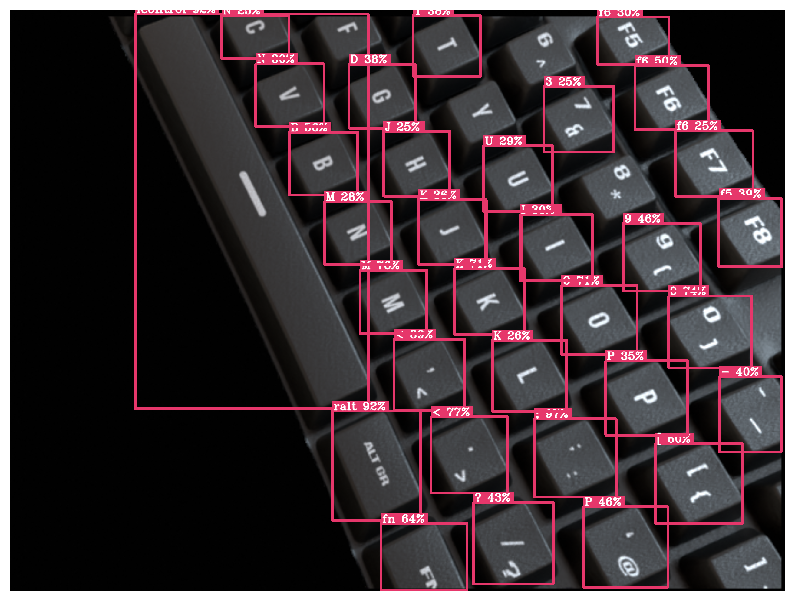

In [20]:
path = random.choice(glob.glob(f"{YOLO_MULTI_DATASET}/valid/images/*"))
print(path)
pred = model.predict(path)[0]
plot_yolo(pred)

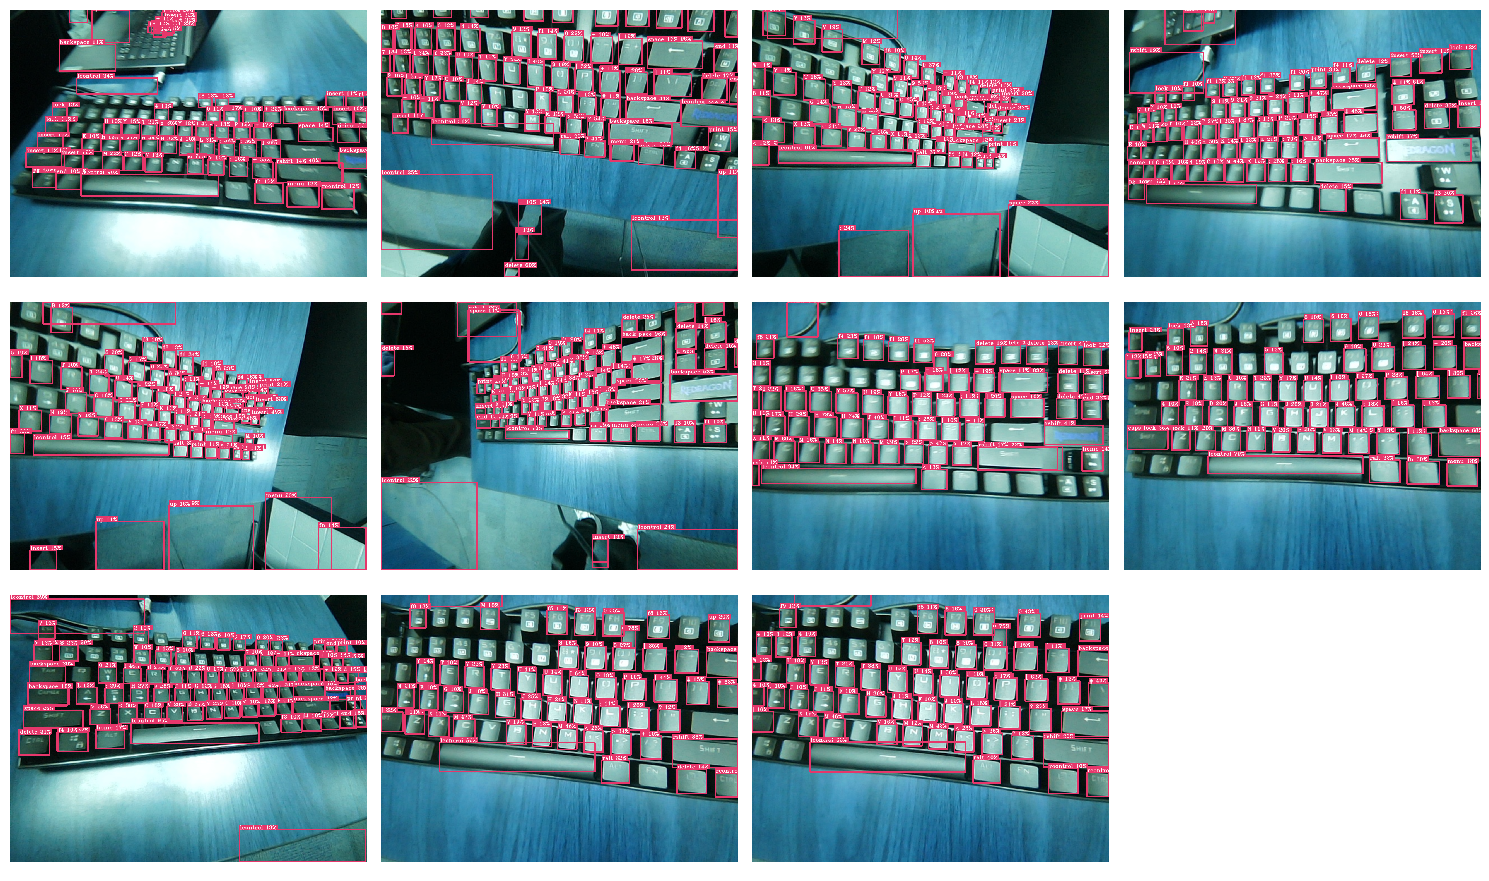

In [19]:
predictions = model.predict([p for p in glob.glob(f"{TEST_DATASET}/*")], iou=0.25, conf=0.1, verbose=False)
images = [plot_yolo(pred, plot=False, scale=2) for pred in predictions]
show_images(images, figsize=(15, 9))

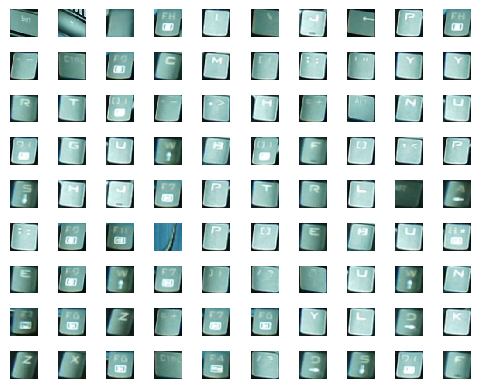

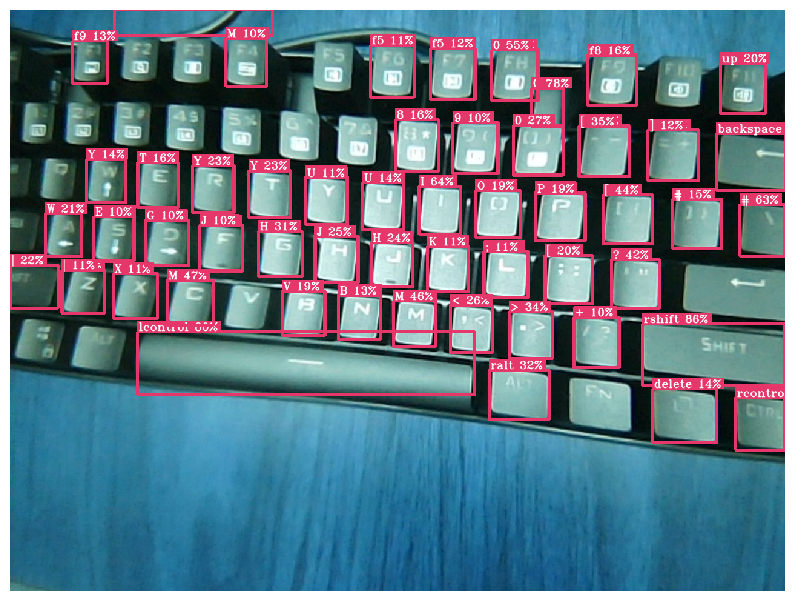

In [17]:
keys = []

pred = random.choice(predictions)
img = pred.orig_img

for box in pred.boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    rect = np.array([(x1, y1), (x2, y1), (x2, y2), (x1, y2)], dtype="int")
    
    crop = crop_rect(img, rect)
    crop = cv2.resize(crop, (64, 64))
    crop = np.rot90(crop, k=-1)
    keys.append(crop)

show_images(keys, figsize=(5, 4))
plot_yolo(pred, scale=2)